# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      0 non-null      float64
 1   x       5000 non-null   int64  
 2   y       5000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 117.3 KB


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


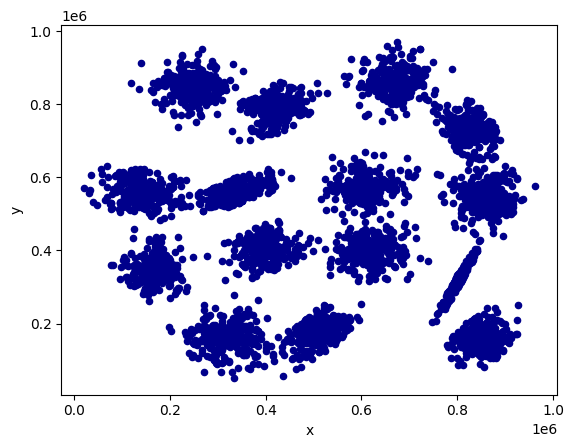

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')


### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

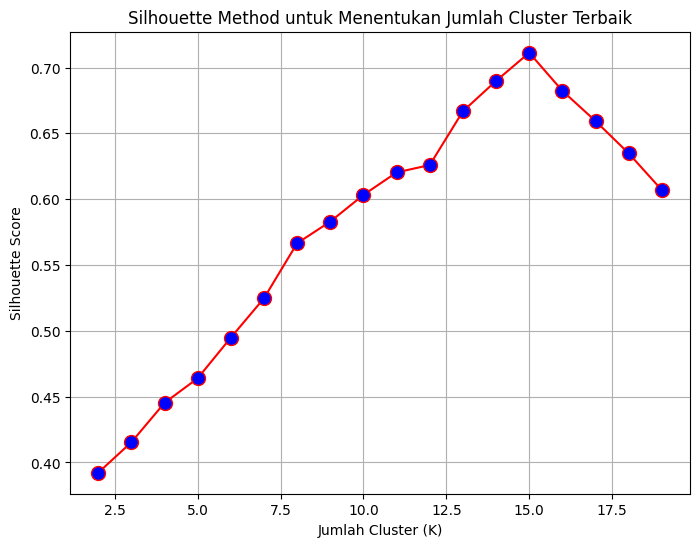

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

silhout = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhout.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), silhout, color='red', marker='o', linestyle='-', markerfacecolor='blue', markersize=10)
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method untuk Menentukan Jumlah Cluster Terbaik')
plt.grid(True)
plt.show()
#END CODE

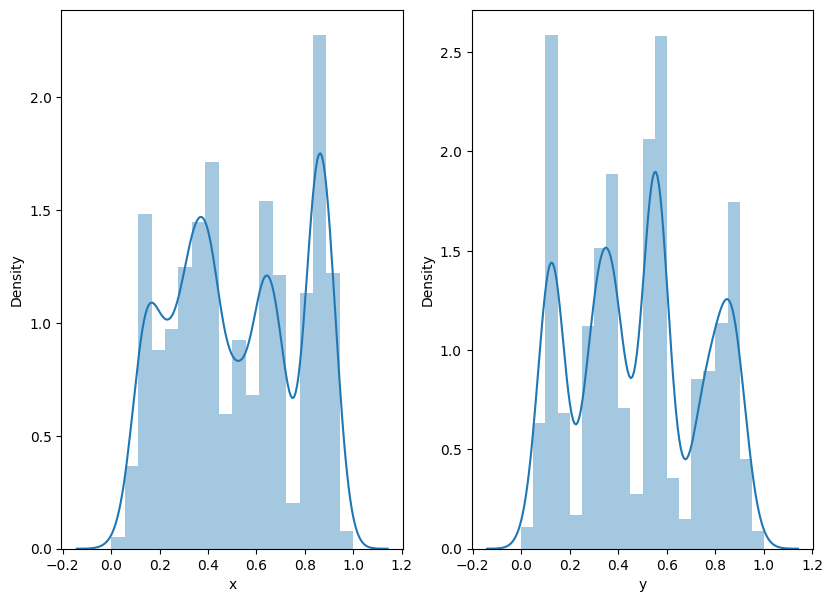

In [ ]:
from warnings import filterwarnings as fw; fw("ignore")
plt.figure(figsize=(15, 7))
n = 0
for i in df.columns:
  n += 1
  plt.subplot(1,3,n)
  sns.distplot(df[i])

plt.show()

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
kmeans = KMeans(n_clusters=15, random_state=123)
kmeans.fit(data)
label = kmeans.labels_
#END CODE

score = silhouette_score(data, label)
print("silhouette score=",score)

silhouette score= 0.711278614093076


In [ ]:
centroids = kmeans.cluster_centers_  # Koordinat centroid untuk setiap kelompok
labels = kmeans.labels_  # Label kelompok untuk setiap data point


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster
#Pertama, masukkan dahulu label hasil clustering ke dalam data

result = data.copy()

#START CODE
result['cluster'] = kmeans.predict(result)
result.head(10)
#END CODE

,x,y,cluster
0,664159,550946,10
1,665845,557965,10
2,597173,575538,10
3,618600,551446,10
4,635690,608046,10
5,588100,557588,10
6,582015,546191,10
7,604678,574577,10
8,572029,518313,10
9,604737,574591,10


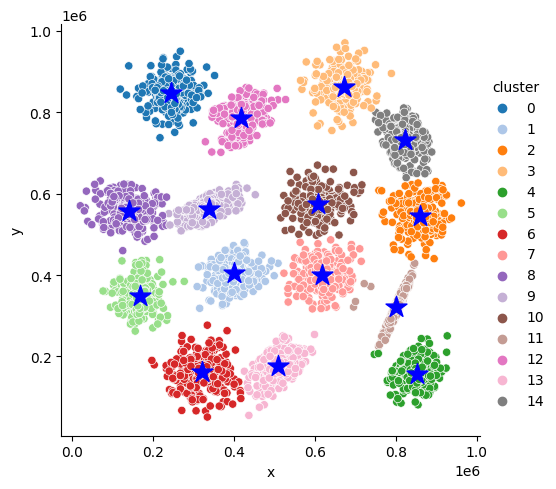

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#START CODE
sns.relplot(x='x', y='y', data=result, hue='cluster', palette='tab20')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='blue', marker='*', s=250)
#END CODE